In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [26]:
data_train = pd.read_csv("Training Data.csv")
data_test =  pd.read_csv("Test Data.csv")

In [27]:
data_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [28]:
data_test.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [29]:
print("Training set size: ", data_train.shape)
print("Test set size: ", data_test.shape)

Training set size:  (252000, 13)
Test set size:  (28000, 12)


In [30]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [31]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


In [32]:
tr_num = data_train.select_dtypes(include = ["int64"]).columns.to_list()
tr_cat = data_train.select_dtypes(include = ["object"]).columns.to_list()
tr_num

['Id',
 'Income',
 'Age',
 'Experience',
 'CURRENT_JOB_YRS',
 'CURRENT_HOUSE_YRS',
 'Risk_Flag']

In [33]:
tr_num_test = data_test.select_dtypes(include = ["int"]).columns.to_list()
tr_cat_test = data_test.select_dtypes(include = ["object"]).columns.to_list()

In [34]:
data_train_num = data_train[tr_num]
    

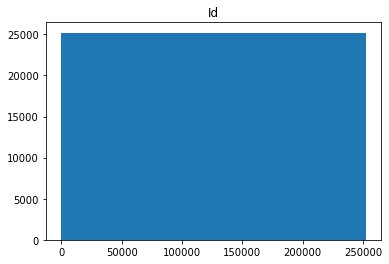

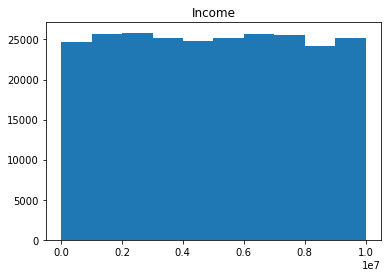

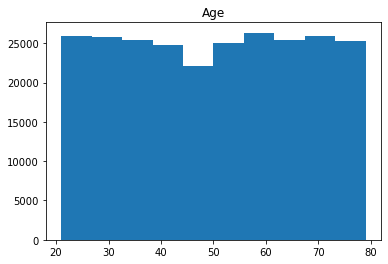

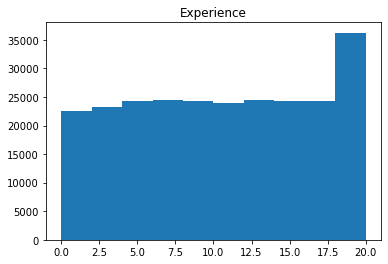

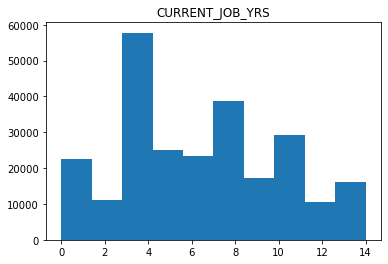

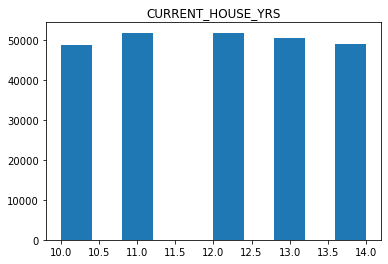

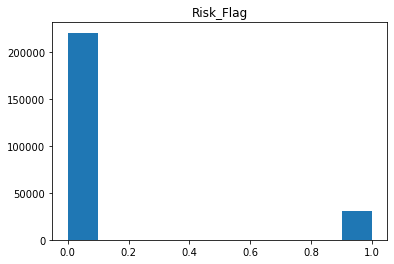

In [35]:
for col in data_train_num.columns:
    plt.hist(data_train_num[col])
    plt.title(col)
    plt.show()

In [36]:
X = data_train.drop(["Id", "Risk_Flag"], axis=1)
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14


In [37]:
y = data_train["Risk_Flag"]
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Risk_Flag, dtype: int64

In [38]:
tr_num.remove("Id")
tr_num.remove("Risk_Flag")

In [39]:
tr_cat

['Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE']

In [40]:
print(X["CITY"].value_counts())

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64


In [20]:
print(X["STATE"].value_counts())

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Manipur                849
Mizoram                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64


In [41]:
X_final = X
y_final = y

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [44]:
X_train.shape

(176400, 11)

In [45]:
y_train.shape

(176400,)

In [58]:
cat_features = np.where(X_train.dtypes != int)[0]
clfr = CatBoostClassifier(iterations = 10, learning_rate = 0.4)

model = clfr.fit(X_train, y_train, cat_features = cat_features, verbose=False)

print("Training accuracy with CatBoost is: ", model.score(X_train, y_train))

Training accuracy with CatBoost is:  0.9314512471655328


In [47]:
X_test.shape

(75600, 11)

In [48]:
y_test.shape

(75600,)

In [51]:
y_pred = model.predict(X_test)
y_pred.shape

(75600,)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Test set accuracy is: ", accuracy_score(y_test, y_pred))

Test set accuracy is:  0.9029232804232804


In [ ]:
print("Test set accuracy is: ", model.score(y))

In [25]:
y_pred = clfr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [24]:
ID = data_test["ID"]

In [29]:
df_predictions =  pd.DataFrame.from_dict({"ID": ID , "Defaulted on a loan": y_pred})
df_predictions

,ID,Defaulted on a loan
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [30]:
df_predictions.to_csv("loan_defauter_predictions.csv", index = False)